In [1]:
from scipy.integrate import ode
import matplotlib.pyplot as plt

# Part I

### Population growth func.

$ \frac{\partial N}{\partial t} = \beta \frac{N^{2}}{1+N} - \delta N  - \rho N^{2}$

In [2]:
birth_rate = 78
death_rate = 48
intraspecific_competition = 2

params = [birth_rate, death_rate, intraspecific_competition]

Lower bound: 2.0
Upper bound: 12.0


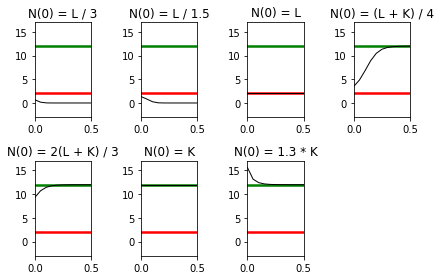

In [3]:
def f(t, N, params):
    return params[0] * (N ** 2) / (N + 1) - params[1] * N - params[2] * (N ** 2)


def solve(N0, t0=0, t1=1, h=0.05):
    r = ode(f).set_integrator('dopri5')
    r.set_initial_value(N0, t0).set_f_params(params)

    N = [N0]
    t = [t0]

    while r.successful() and r.t < t1:
        t.append(r.t + h)
        N.append(r.integrate(r.t + h))
    return N, t


L = (-(((params[0] - params[1] - params[2]) ** 2 - 4 * params[1] * params[2]) ** 0.5) - params[0] + params[1] + params[2]) / (-2 * params[2])
K = ((((params[0] - params[1] - params[2]) ** 2 - 4 * params[1] * params[2]) ** 0.5) - params[0] + params[1] + params[2]) / (-2 * params[2])

if K < L:
    L, K = K, L

print("Lower bound: {}".format(L))
print("Upper bound: {}".format(K))


starts = [
    [L / 3, "L / 3"],
    [L / 1.5, "L / 1.5"],
    [L, "L"],
    [(K + L) / 4.0, "(L + K) / 4"],
    [2.0 * (K + L) / 3.0, "2(L + K) / 3"],
    [K, "K"],
    [1.3 * K, "1.3 * K"]
]

t0 = 0
t1 = 0.5

for i in range(len(starts)):
    plt.subplot(2, 4, i + 1)
    N, t = solve(starts[i][0], t0)
    lines = plt.plot(t, [K] * len(t), t, [L] * len(t), t, N)
    plt.title('N(0) = ' + starts[i][1])
    plt.axis([t0, t1, L - 5, K + 5])
    plt.setp(lines[0], color='g', linewidth=2.5)
    plt.setp(lines[1], color='r', linewidth=2.5)
    plt.setp(lines[2], color='black', linewidth=1.0)

plt.tight_layout()

# Part II

### Func. of fish population

$\dot{N} = 0.007 N^{2} - 1.4 N$ 

In [4]:
starts = [200, 150]
t1 = 20

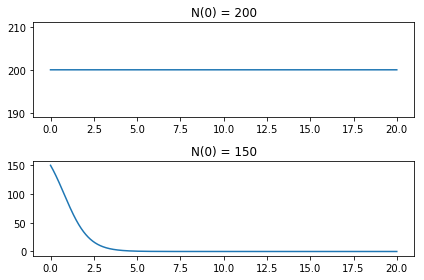

In [5]:
def f(t, N):
    return 0.007 * N ** 2 - 1.4 * N


def solve(N0, t0=0, t1=1, h=0.05):
    r = ode(f).set_integrator('vode', method='bdf')
    r.set_initial_value(N0, t0)

    N = [N0]
    t = [t0]

    while r.successful() and r.t < t1:
        t.append(r.t + h)
        N.append(r.integrate(r.t + h))
    return N, t

for i in range(len(starts)):
    plt.subplot(2, 1, i + 1)
    N, t = solve(starts[i], t0=0, t1=t1, h=0.01)
    plt.title("N(0) = " + str(starts[i]))
    plt.plot(t, N)

plt.tight_layout()